# Moving Average Process

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

In [2]:
plt.rcParams["figure.figsize"] = [10, 7.5]

## Simulate MA(2) Process

$y_t = 0.9 Z_{t-1} + 0.3 Z_{t-2}$

In [3]:
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])

In [4]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

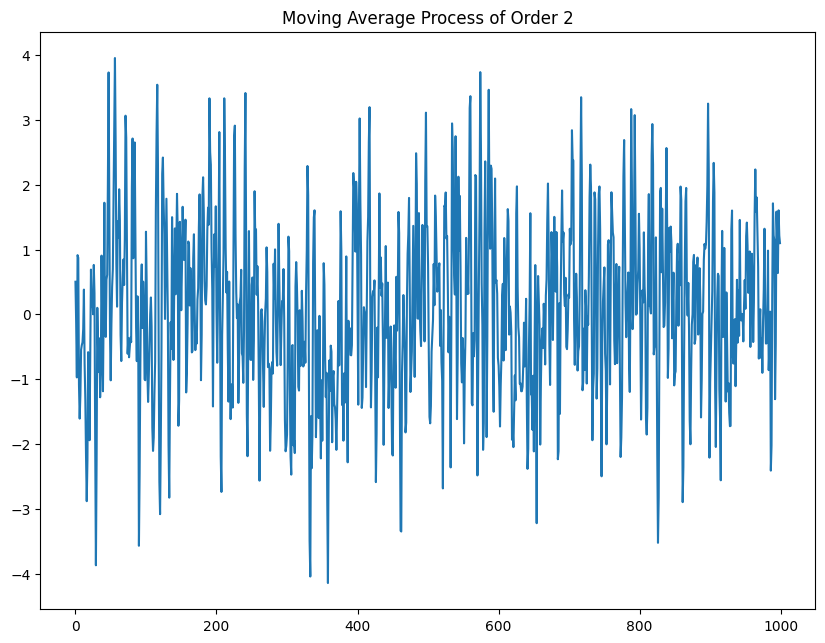

In [5]:
plt.plot(MA2_process)
plt.title("Moving Average Process of Order 2")
plt.show()

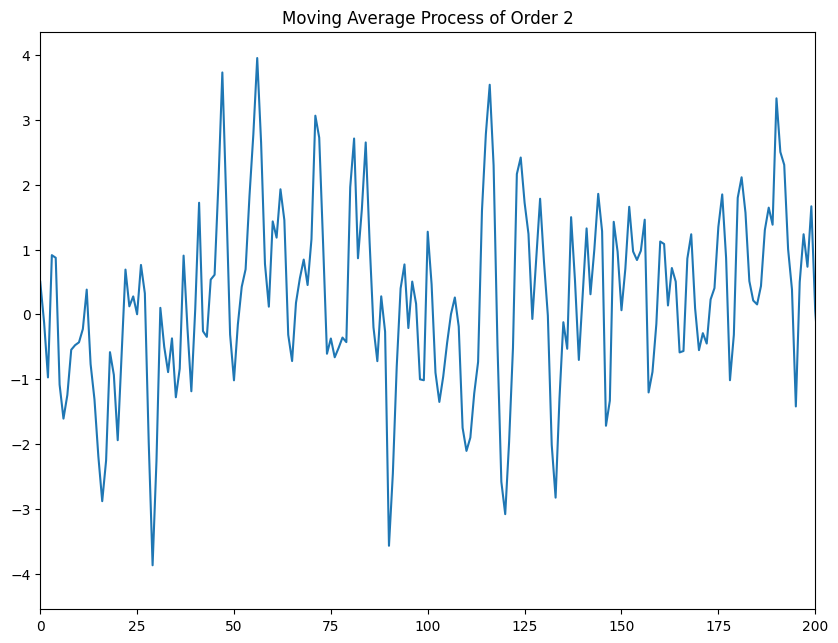

In [6]:
plt.plot(MA2_process)
plt.title("Moving Average Process of Order 2")
plt.xlim(0, 200)
plt.show()

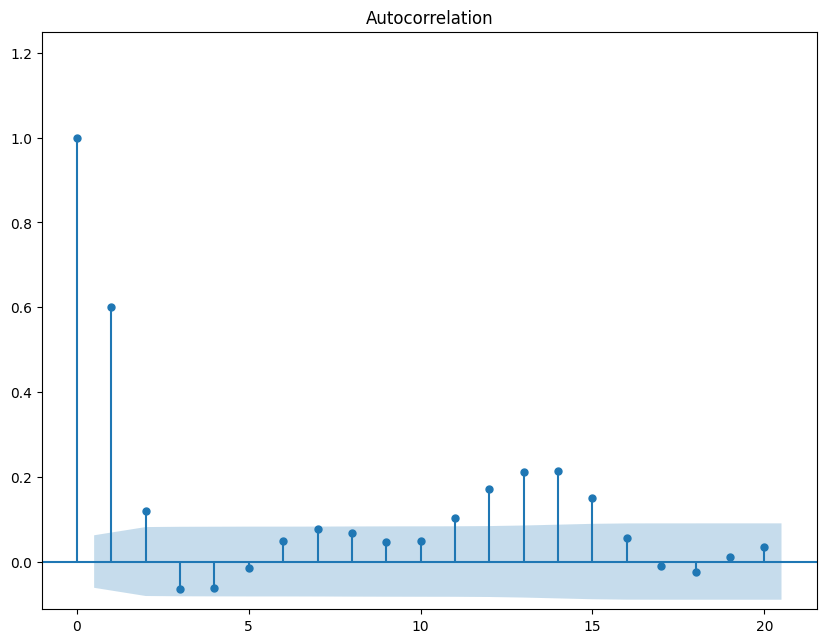

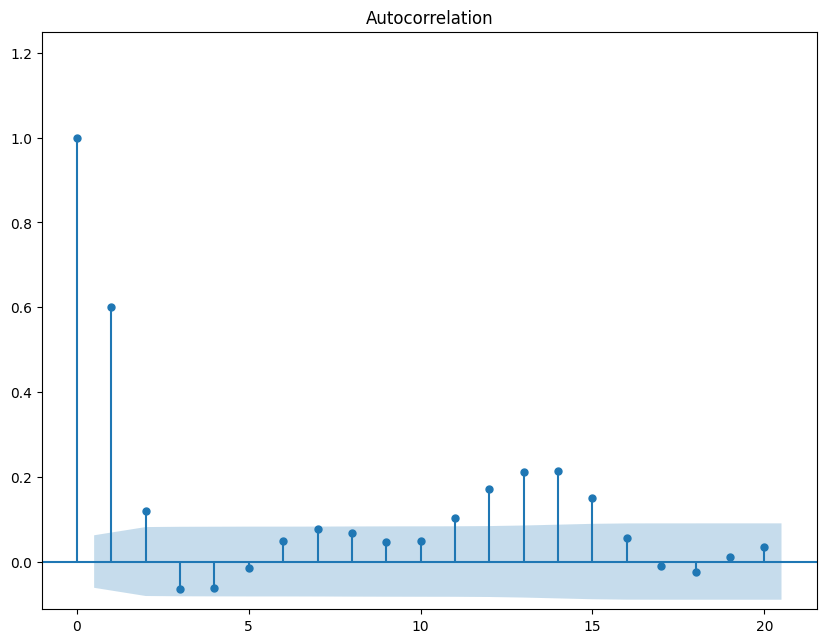

In [7]:
plot_acf(MA2_process, lags=20, auto_ylims=True)

In [8]:
MA_model = ARIMA(
    MA2_process,
    order=(0, 0, 2),
    enforce_stationarity=False,
).fit()
MA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1386.765
Date:                Tue, 29 Aug 2023   AIC                           2781.530
Time:                        14:31:57   BIC                           2801.149
Sample:                             0   HQIC                          2788.988
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0735      0.067      1.096      0.273      -0.058       0.205
ma.L1          0.8836      0.030     28.980      0.000       0.824       0.943
ma.L2          0.2961      0.030      9.769      0.000       0.237       0.355
sigma2         0.9448      0.043     22.140      0.000       0.861       1.028
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.96   Prob(JB):                         0.98
Heteroskedasticity (H):               0.98   Skew:                            -0.00
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""